# Bernstein-Vazirani(Fourier Sampling) Algorthm(Problem)
> Let's say there is a 6-bit information inside a box then how many attempts do we needed to guess that information correctly. for example classical computer's will take 6 attempts for 6 bit-information but if the number of bit increases then number of attempts will also increase for classical computer to guess that number but if we have a quantum computer then using Bernstein-Vazirani algorith we can guess that information in a single attempt. We can see that this algorithm show that quantum computer outperfom the classical computer.

**Algorithm :**

0. Secret Number in a box : 101001 
1. If we feed a guess number then box says yes if it is or no if it's not. How do we determine this secret number ?
2. Classical Computer : 000000, 000001,..., 64th
3. Quantum Computer :
   |BOX |101001|
   |----|-----|
   |AND |000001|
   |AND |000010|
   |AND |000100|
   |AND |001000|
   |AND |010000|
   |AND |100000|
   |Answer|101001|





In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

In [45]:
secret_number = '101001'

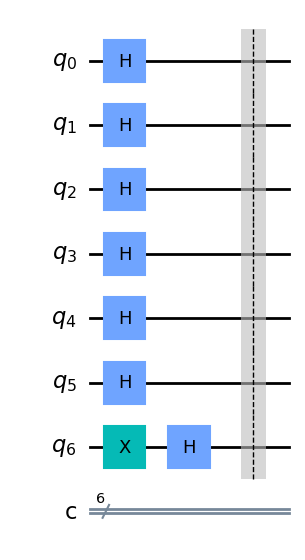

In [46]:
qc = QuantumCircuit(6+1, 6)
qc.h([0, 1, 2, 3, 4, 5])
qc.x(6)
qc.h(6)
qc.barrier()
qc.draw(output='mpl')

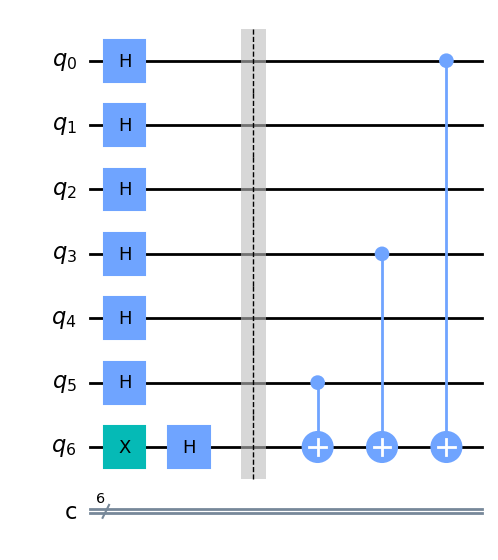

In [47]:
# building box of secret number
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(0, 6)


qc.draw(output='mpl')

In [48]:
qc.barrier()
qc.h([0, 1, 2, 3, 4, 5])


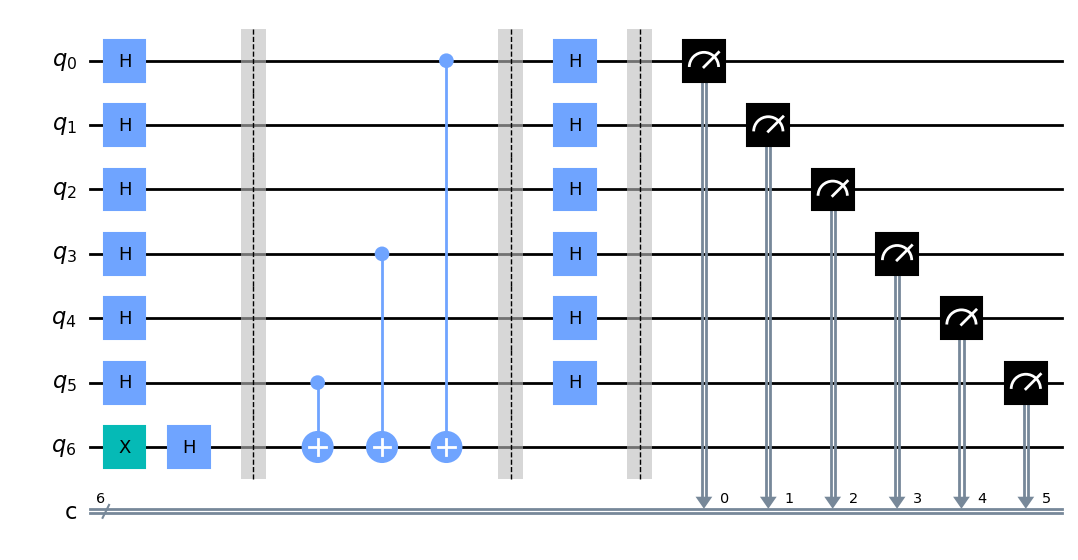

In [49]:
qc.barrier()
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

qc.draw(output='mpl')

In [50]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [51]:
secret_number = '1000100110010101001'

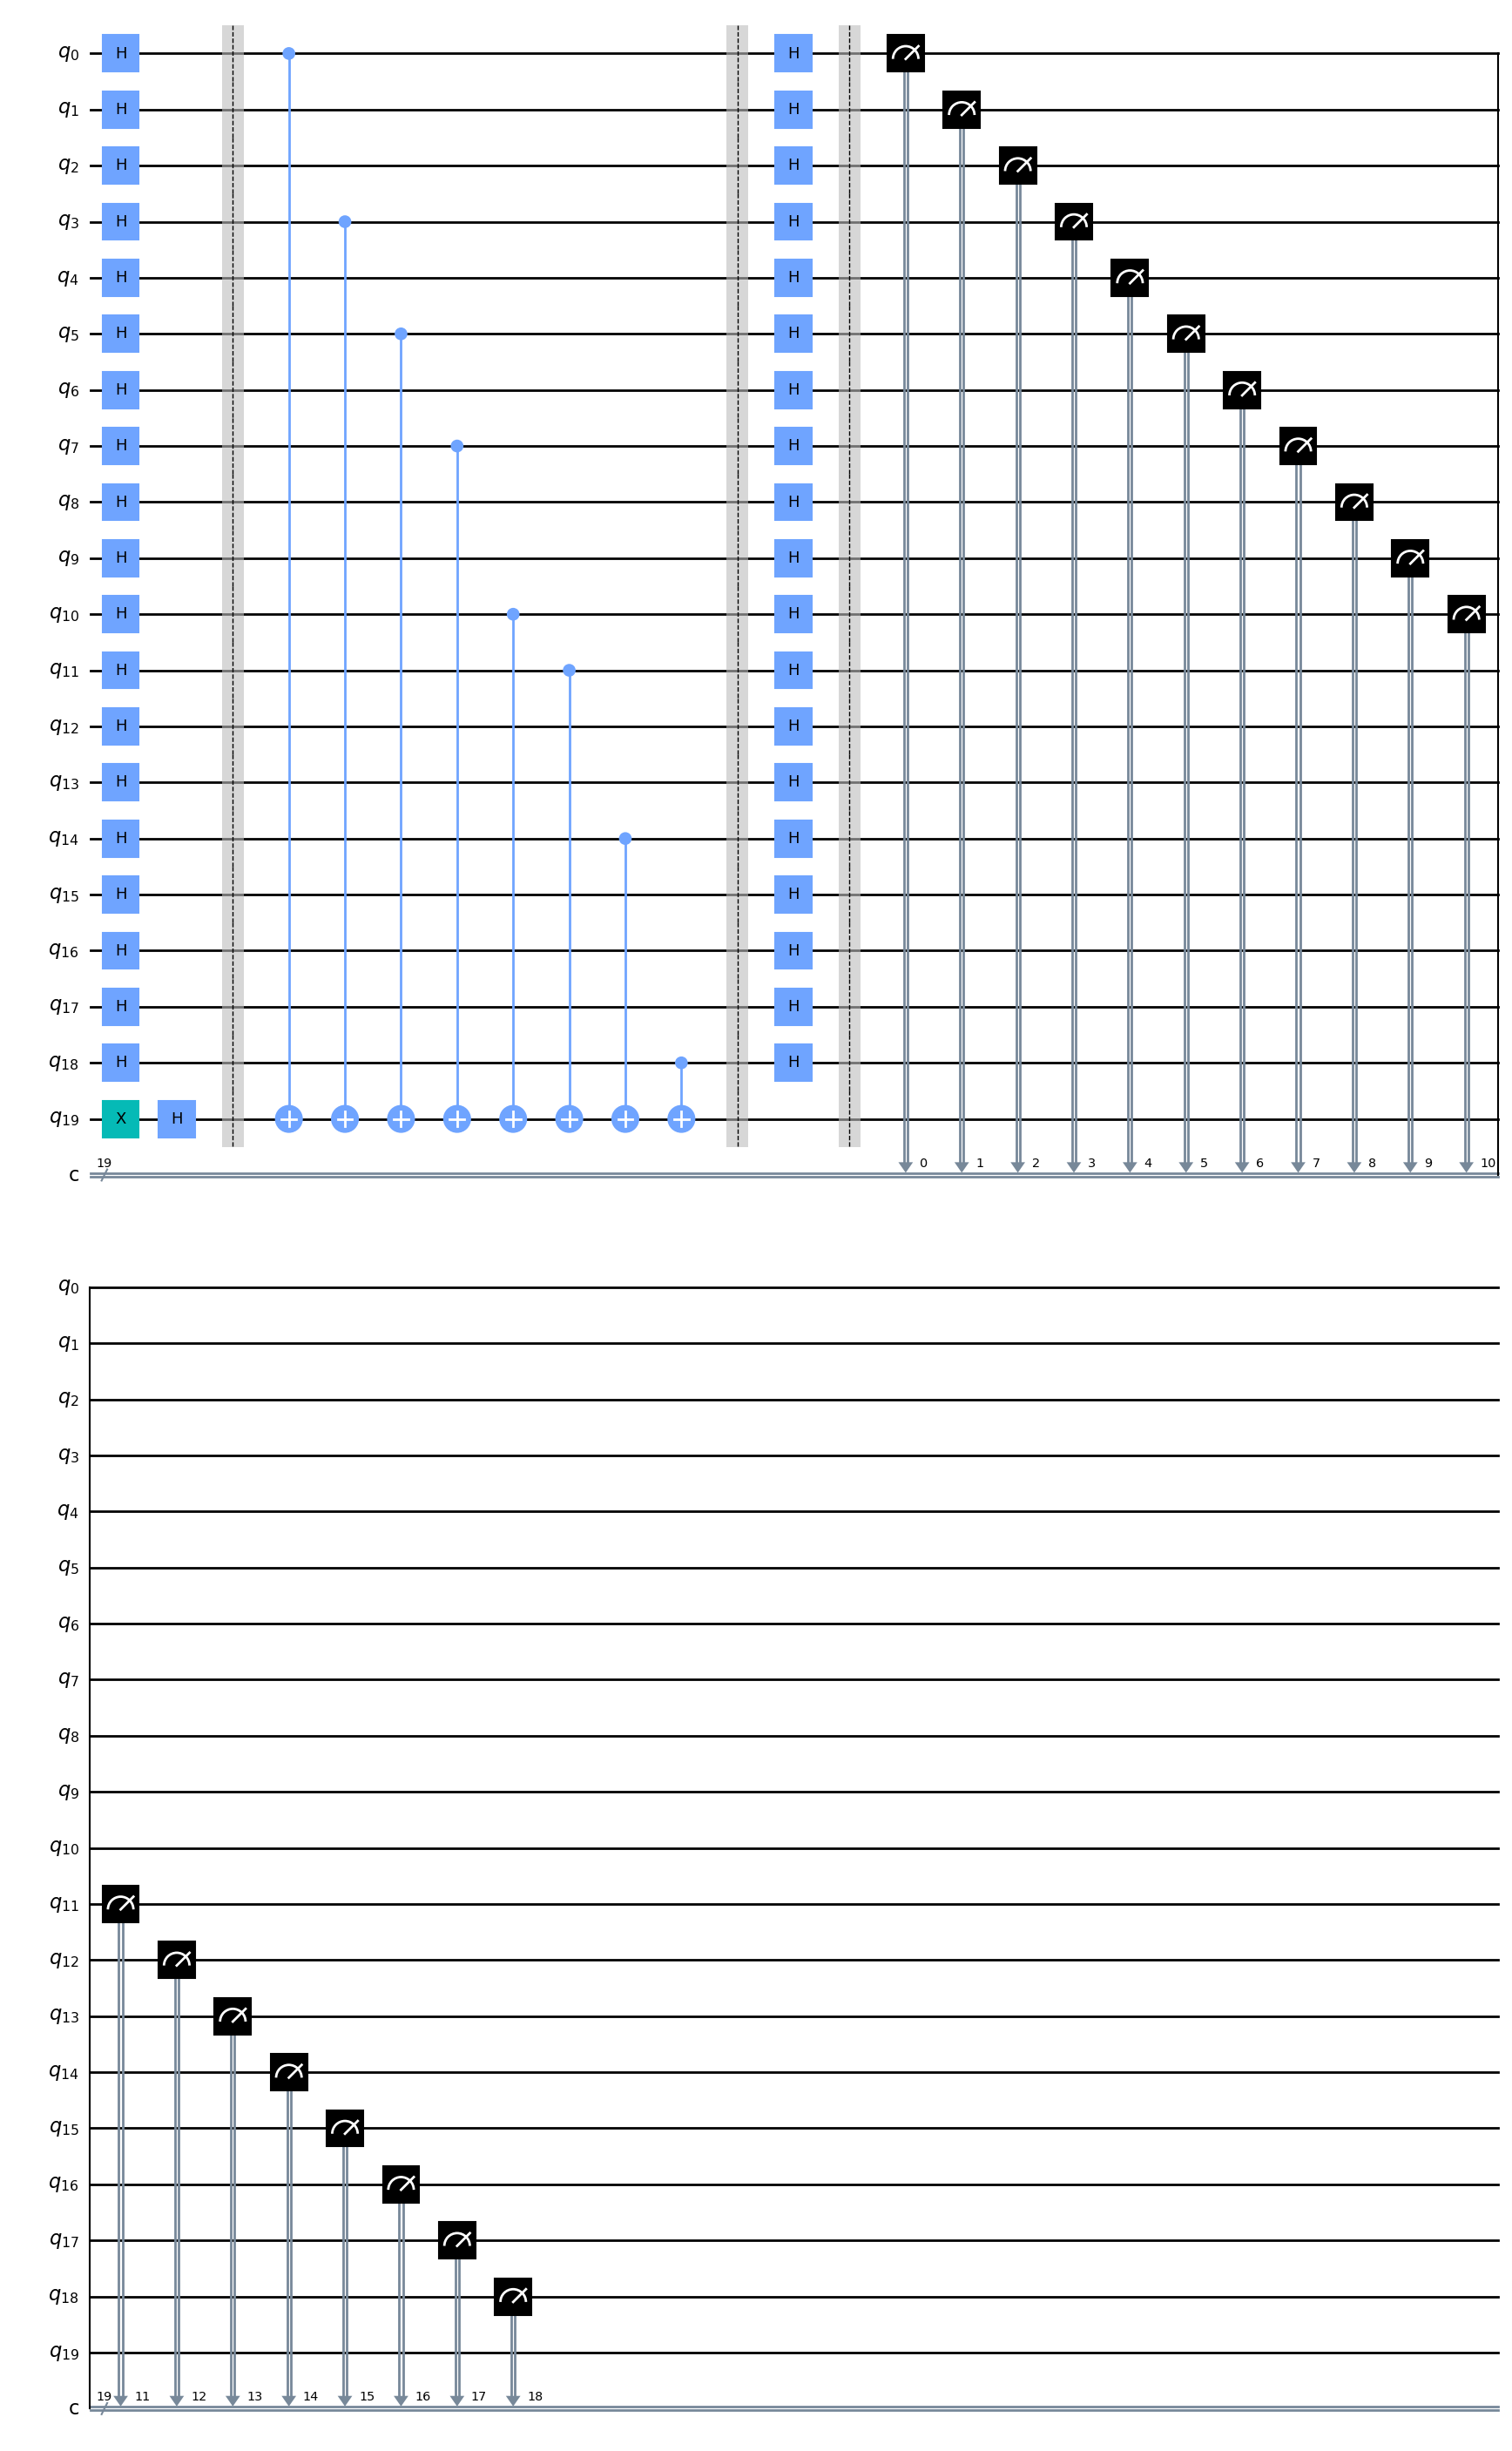

In [52]:
qc = QuantumCircuit(len(secret_number)+1, len(secret_number))
qc.h(range(len(secret_number)))
qc.x(len(secret_number))
qc.h(len(secret_number))
qc.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        qc.cx(ii, len(secret_number))
        
        
qc.barrier()
qc.h(range(len(secret_number)))

qc.barrier()
qc.measure(range(len(secret_number)), range(len(secret_number)))

qc.draw(output='mpl')

In [53]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000100110010101001': 1}


**Binary Dot Product :**
> Let's two binary strings $x = x_{n-1} \cdots x_0$ and $y = y_{n-1}\cdots y_0$ of length $n$, Then

$$
x \cdot y = x_{n-1} y_{n-1} \oplus \cdots \oplus x_0 y_0.
$$

i.e 

$$
x \cdot y = 
\begin{cases}
1 & \textsf{if $x_{n-1} y_{n-1} + \cdots + x_0 y_0$ is odd}\\[0.5mm]
0 & \textsf{if $x_{n-1} y_{n-1} + \cdots + x_0 y_0$ is even.}
\end{cases}
$$

To understand the binary dot product $x \cdot y$ we needed to think that it equals the parity of those bits of $x$ in positions where the string $y$ has a $1$, which is equivalent to the parity of those bits of $y$ in positions where the string $x$ has a $1.$

**Bernstein-Vazirani problem**
> Input: a function $f:\{0,1\}^n\rightarrow\{0,1\}$ \
> Promise: there exists a binary string $s = s_{n-1} \cdots s_0$ for which $f(x) = s\cdot x$ for all $x\in\Sigma^n$ \
> Output: the string $s$

### Modular Programming Approach to Implement this Algorithm

Step-01 : Implementing a query gate for the BErnstein-Vazirani alogrithm for given any binary string, lets say s.

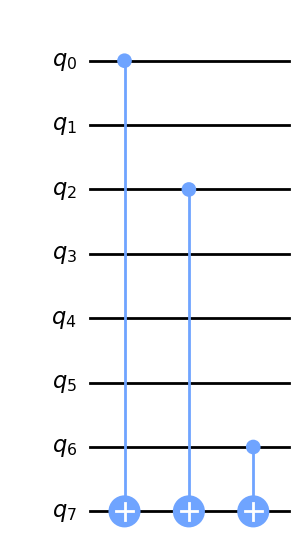

In [6]:
def BernVazirani_Function(s):
    """ 
    
    """
    qc = QuantumCircuit(len(s)+1)
    for index, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.cx(index, len(s))
    return qc
    
BernVazirani_Function('1000101').draw(output='mpl')

In [8]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Bernstean Vazirani algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [11]:
def BernVazirani_Algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots = 1, memory=True).result()
    return result.get_memory()[0]

BernVazirani_Algorithm(BernVazirani_Function('1000101'))

'1000101'

### Conclusion 
> You can seen here that we find the our secret number/ function in just few number of guesses using the Bernstean Vazirani Algorithm